# Algoritmi di ricerca

*(Sezione 12.6 del libro di testo)*

Fin'ora abbiamo ignorato del tutto considerazioni sul tempo di esecuzione dei programmi. Tutti i programmi che abbiamo provato hanno tempi di esecuzione istantanei. Tuttavia, i tempi erano istantanei anche perché i dati su cui applicarli erano piccoli. Ma quando la quantità dei dati da elaborare cresce, possono nascere problemi. 

Studieremo in questa lezione il problema di determinare la posizione di un elemento all'interno di una lista, e come lo si possa fare in maniera efficiente. È un problema *classico* dell'informatica. Vedremo che esistono due *algoritmi* di base per svolgere questo compito:

  * ricerca lineare (o sequenziale), che è sempre applicabile ma è lenta
  * ricerva binaria, che è applicabile solo i valori nella lista sono ordinati, ma che è molto più veloce.

## Ricerca lineare

Vogliamo risolvere il seguente problema: scrivere una funzione che data una lista *l* ed un valore *x*, restituisca la posizione della prima occorrenza di *x* in *l*. Se *x* non compare in *l*, la funzione deve restituire *-1*. Nella lezione sulle liste abbiamo già visto il codice di questa funzione, che lì avevamo chiamato `cerca_lista`.
 
Si tratta essenzialmente di quello che fa il metodo *index* della classe *list*, con la differenza che *index* restituisce un errore se il valore cercato non esiste. 

In [1]:
def linear_search(l, x):
    """
    Restituisce la posizione della prima occorrenza di x in l, se esiste, altrimenti restituisce -1.
    """
    for i in range(len(l)):
        if l[i] == x:
            return i
    return -1

Questo algoritmo è effettivamente noto con il nome di *riceca lineare* o *ricerca sequenziale*. Si tratta del primo algoritmo a cui diamo un nome, non tanto per merito suo, quanto per distinguerlo dall'algoritmo molto più sofisticato di *ricerca binaria* che vedremo dopo.

Siccome vogliamo provare le prestazioni di questo algoritmo, ha senso utilizzare una lista abbastanza lunga su cui testarlo.  Per far ciò, utilizziamo il file *words.txt* che contiene una serie di parole prese da un dizionario inglese, che carichiamo e inseriamo nella lista words con il codice qui sotto (potete igorare il codice).

In [2]:
with open("words.txt") as f:
    words = f.read().splitlines()
words.sort()

In [3]:
words

['&c',
 "'d",
 "'em",
 "'ll",
 "'m",
 "'mid",
 "'midst",
 "'mongst",
 "'prentice",
 "'re",
 "'s",
 "'sblood",
 "'sbodikins",
 "'sdeath",
 "'sfoot",
 "'sheart",
 "'shun",
 "'slid",
 "'slife",
 "'slight",
 "'snails",
 "'strewth",
 "'t",
 "'til",
 "'tis",
 "'twas",
 "'tween",
 "'tween-decks",
 "'twere",
 "'twill",
 "'twixt",
 "'twould",
 "'un",
 "'ve",
 '-i-',
 "-n't",
 '-o-',
 "-s'",
 '10-point',
 '1080',
 '10th',
 '11-point',
 '12-point',
 '16-point',
 '18-point',
 '1st',
 '2',
 '2,4,5-t',
 '2,4-d',
 '20-point',
 '2D',
 '2nd',
 '3-D',
 '30-30',
 '3D',
 '3M',
 '3rd',
 '4-D',
 '48-point',
 '4GL',
 '4H',
 '4th',
 '5-T',
 '5-point',
 '5th',
 '6-point',
 '6th',
 '7-point',
 '7th',
 '8-point',
 '8th',
 '9-point',
 '9th',
 'A&M',
 'A&P',
 "A'asia",
 'A-1',
 'A-OK',
 'A-and-R',
 'A-axes',
 'A-axis',
 'A-blast',
 'A-bomb',
 'A-day',
 'A-flat',
 'A-frame',
 'A-line',
 'A-one',
 'A-pole',
 'A-scope',
 'A-shaped',
 'A-sharp',
 'A-tent',
 'A-war',
 'A-weapons',
 'A.',
 'A.A.A.',
 'A.B.',
 'A.B.A.',


La lista è composta da quasi 500.000 elementi.

In [4]:
len(words)

466550

Se proviamo a cercare una parola, per esempio `dog`, l'esecuzione della funzione `linear_search` è comunque immediata.

In [5]:
linear_search(words, "dog")

169365

La cosa più lenta che possiamo fare è cercare un parola che non esiste, perché in tal caso l'algoritmo di ricerca sequenziale dovrà scorrere tutta la lista per constatare che la parola non si troval al suo interno. Anche in questo caso, la risposta è praticamente immediata.

In [6]:
linear_search(words, "abcxyz")

-1

Potremmo ovviamente provare con una lista ancora più grande, ma una alternativa è eseguire `linear_search` molte volte, vedere il tempo totale di esecuzione e poi dividere per il numero di volte che l'abbiamo eseguita. Fortunantamente, all'interno dei notebook c'è una funzionalità (che non ha niente a che fare con Python) per misurare il tempo di esecuzione di una cella. Basta inserire `%%timeit` come prima riga di una cella, e VSCode proverà a calcolare il tempo di esecuzione della cella come spiegato sopra, facendo delle esecuzioni ripetute ed estraendo il tempo medio.

In [7]:
%%timeit
linear_search(words, "dog")

2.21 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Il risultato è che per cercare la stringa `dog` all'interno della lista, ci mette in media 2.21 millsecondi con una deviazione standard di circa 10 microsecondi. Questi risultati ovviamente dipendono in maniera determinante dal computer nel quale viene eseguita la misurazione, e se ci riprovate sul vostro computer otterrete probabilmente valori diversi.

Se si prova a cercare un stringa che non esiste, ci aspettiamo che il tempo di esecuzione sia superiore.

In [8]:
%%timeit
linear_search(words, "abcxyz")

6.41 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Il tempo di esecuzione medio è circa 3 volte il precedente. D'altronde, la lunghezza della lista wods è 466550 mentre la posizione della stringa `dog` nella lista è 169365. Pertano, quando linear_search viene chiamata con la stringa `dog`, deve controllare solo 169366 posizioni, quando viene chiamata con una stringa inesistente ne deve controllare 466550, e 466550 / 169365 è circa 2.75.

Ovviamente le prestazioni migliori si avranno se cerco il primo elemento della lista.

In [9]:
words[0]

'&c'

In [10]:
%%timeit
linear_search(words, "&c")

72.9 ns ± 0.0338 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


Vediamo che il tempo di esecuzione è enormemente più piccolo: 73 nanosecondi.

## Ricerca binaria

Questo è l'algoritmo di ricerca binaria nella versione ricorsiva. Poteter trovare la spiegazione del funzionamento nella sezione 12.6 del libro di testo.

In [11]:
def binary_search_aux(l, v, start, end):
    """
    Funzione ausiliaria di binary_search.

    Restituisce la posizione di v nella porzione di lista l che va dalla posizione
    start alla posizione end (estremi inclusi). Se la lista l non contiene v,
    restituisce -1. La lista l deve essere ordinata.

    Attenzione, non è detto che venga restituita la prima posizione di x.
    """
    if start > end:
        return -1
    mid  = (start + end) // 2
    if v == l[mid]:
        return mid
    elif v > l[mid]:
        return binary_search_aux(l, v, mid+1, end)
    else:
        return binary_search_aux(l, v, start, mid-1)

def binary_search(l, v):
    """
    Restituisce la posizione di v nella lista l. Se la lista l non contiene v,
    restituisce -1. La lista l deve essere ordinata.

    Attenzione, non è detto che venga restituita la prima posizione di x.
    """
    return binary_search_aux(l, v, 0, len(l)-1)

Facciamo un paio di prove per vedere se la funzione `binary_search` funziona.

In [12]:
l = [2, 5, 10, 15, 23, 99]

In [13]:
binary_search(l, 23)

4

In [14]:
binary_search(l, 17)

-1

Cerchiamo ora di confrontare le prestazioni di questo algoritmo con il precedente. Proviamo ad invocare la funzione `binary_search` su una stringa che non esiste. Vi ricordo che l'algoritmo di ricerca sequenziale ci metteva circa 6.5 ms.

In [16]:
%%timeit
binary_search(words, "abcxyz")

1.24 µs ± 1.47 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Attenzione che il risultato è in micro-secondi, mentre per `linear_search` era in milli-secondi. Dunque, la ricerca binaria, almeno in questa occasione, è 5000 volte più veloce.

Python mette a disposizione il metodo `index` per la classe `list`, che implementa una ricerca lineare simile alla nostra `linear_search`. Tuttavia, `index` genera un errore se l'elemento cercato non esiste. Siccome vogliamo controllare le prestazione di `index` rispetto a `linear_search`, proviamo a cercare una parola esistente nella lista `words`, ovvero la parola `zebra`.

In [17]:
%%timeit
linear_search(words, "zebra")

6.26 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
words.index("zebra")

2.2 ms ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vediamo che il metodo di Python è più veloce della ricerca lineara implementata da noi. Tuttavia, il miglioramento è un fattore di circa 2 o 3, non paragonabile al fattore 5.000 che otteniamo usando la ricerca binaria.

In [19]:
%%timeit
binary_search(words, "zebra")

1.25 µs ± 2.18 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Esecuzione passo-passo

Quella che segue è l'esecuzione passo passo della funzione di ricerca binaria. I numeri di riga sono riferiti a questa versione del programma:

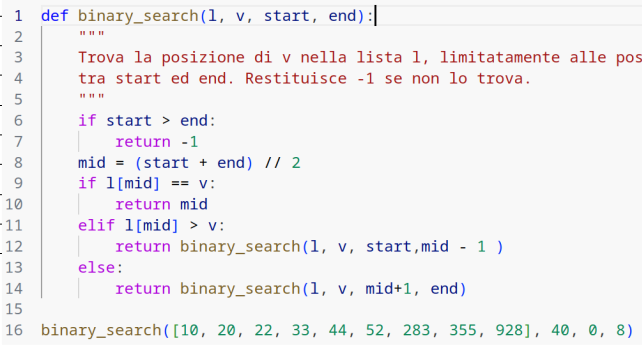

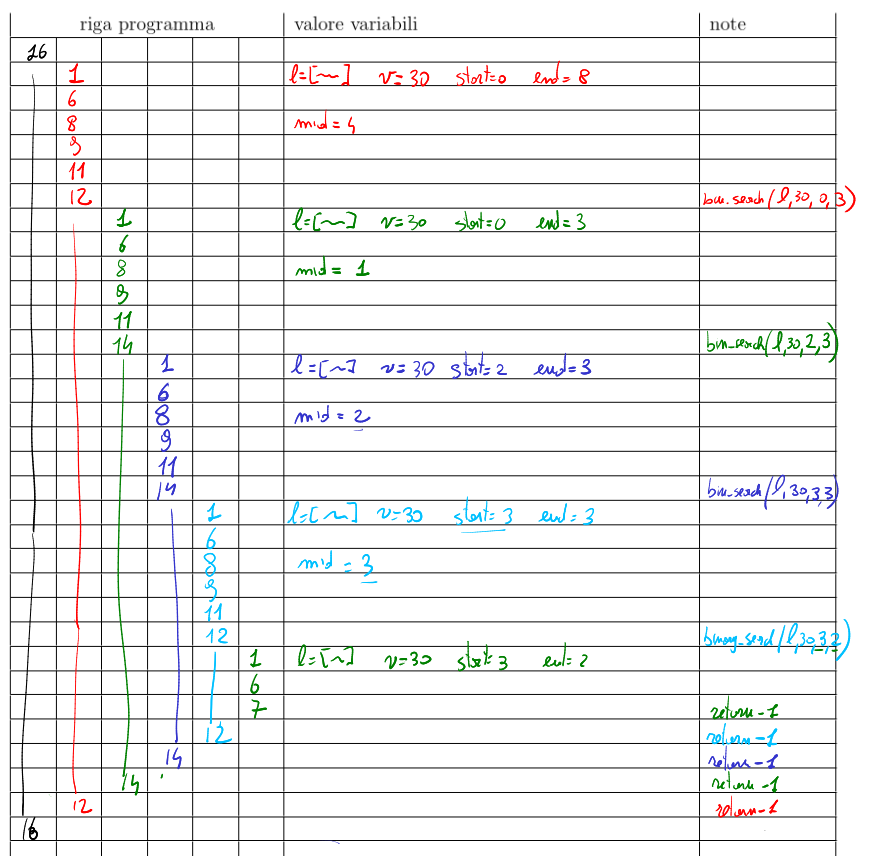


### Versione iterativa

È possibile scrivere senza troppe difficoltà una versione iterativa della ricerca binaria. In questo caso, `start` ed `end` sono due variabili che vengono aggiornate all'inerno di un ciclo `while` che termina quando `start > end`.

In [20]:
def binary_search_iter(l, x):
    """
    Restituisce la posizione di x in l se esiste, altrimenti restituisce -1.
    La lista l deve essere ordinata.
    """
    start = 0
    end = len(l) - 1
    while end >= start:
        middle = (start + end) // 2
        if l[middle] == x:
            return middle
        elif l[middle] < x:
            # invece di chiamare ricorsivamente la funzione, altero manualmente start
            start = middle + 1
        else:
            # invece di chiamare ricorsivamente la funzione, altero manualmente end
            end = middle - 1
    return -1

La versione iterativa della ricerca binaria è più efficiente della versione iterativa, ma l'ordine di grandezza è lo stesso.

In [21]:
%%timeit
binary_search_iter(words, "zebra")

1 µs ± 1.07 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
